# Titanic Kaggle

## Import

In [81]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from statistics import mean
import matplotlib.pyplot as plt

## Load 

In [82]:
train = pd.read_csv('data/train.csv', sep = ',')
train.set_index('PassengerId', inplace=True, drop=True)
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Colonne numériques et catégorielles

In [84]:
col_num = ['Pclass','SibSp','Parch','Fare']
col_cat = ['Name','Sex','Ticket','Cabin','Embarked','Age']

In [85]:
def parse_model_0(X, col) :
    target = X.Survived
    X = X[col]
    return X, target

In [86]:
X_num, y = parse_model_0(train.copy(),col_num)
X_cat, y = parse_model_0(train.copy(),col_cat)

## Etude des variables

In [87]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]
print("Survived = " + str(survived.size) 
      + ", Dead = " + str(dead.size) 
      + " , Ratio a améliorer = " + str(dead.size/(survived.size+dead.size)))

Survived = 3740, Dead = 6039 , Ratio a améliorer = 0.6175478065241845


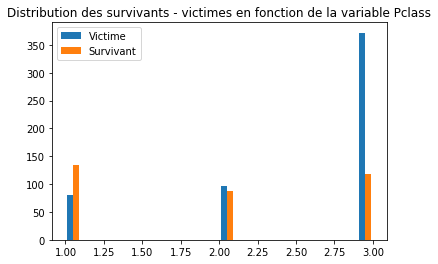

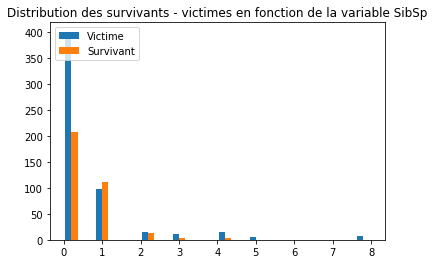

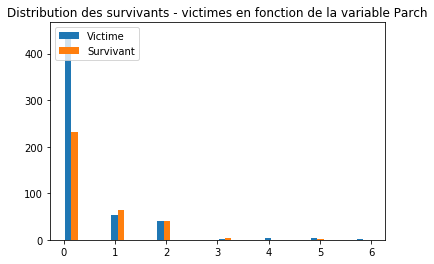

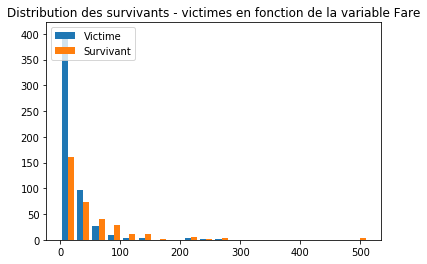

In [88]:
def plot_hist(feature):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1,x2], label=['Victime','Survivant'], bins = 20)
    plt.legend(loc = 'upper left')
    plt.title('Distribution des survivants - victimes en fonction de la variable '+ feature)
    plt.show()
for col in col_num:
    plot_hist(col)

## Transformation des variables catégorielle

In [89]:
col_num = ['Pclass','SibSp','Parch','Fare','Sex','Embarked']
col_cat = ['Name','Ticket','Cabin','Age']

* Binariser des variables Sex et Embarked

In [112]:
X_num, y = parse_model_0(train.copy(),col_num)
X_cat, y = parse_model_0(train.copy(),col_cat)
X_num.Sex.replace(['male', 'female'], [1, 0], inplace=True)
X_num.Embarked.replace(['C', 'Q', 'S'], [1,2,3], inplace=True)
X_num['IsChild'] = X_cat.Age < 10
X_num.IsChild.replace([False, True], [0,1], inplace=True)
X_num.head(5)

,Pclass,SibSp,Parch,Fare,Sex,Embarked,IsChild
PassengerId,,,,,,,
1,3,1,0,7.2500,1,3,0
2,1,1,0,71.2833,0,1,0
3,3,0,0,7.9250,0,3,0
4,1,1,0,53.1000,0,3,0
5,3,0,0,8.0500,1,3,0


## Normalisation des données numériques

In [113]:
standard_scalar = StandardScaler()
standard_scalar.fit(X_num)
X_num_scale =  standard_scalar.transform(X_num)

## Validation croisée

In [114]:
def compute_score(clfs, X, y): 
    resulta = []
    for clf in clfs:
        resulta.append(cross_val_score(clf, X, y, cv = 5))
    return np.mean(resulta, axis=1)

* Sur les variables numériques

In [121]:
lrs = [DecisionTreeClassifier(random_state=1), 
       KNeighborsClassifier(n_neighbors=5),
       RandomForestClassifier(n_estimators=10),
       MLPClassifier(hidden_layer_sizes=(10,15), max_iter=1000)]

In [124]:
compute_score(lrs, X_num, y)

array([0.81781883, 0.74240462, 0.80768742, 0.6896972 ])

* Sur les variables numériques normalisé

In [125]:
compute_score(lrs, X_num_scale, y)

array([0.81781883, 0.81559068, 0.80994096, 0.82232591])